# Dates and Times in Python

In [1]:
from datetime import datetime
datetime(year=2019, month=6, day=4)

datetime.datetime(2019, 6, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2019")
date



datetime.datetime(2019, 7, 4, 0, 0)

In [3]:
# Once you have a datetime object, you can do things like printing the day of the week
date.strftime('%A')

'Thursday'

 # Typed arrays of times: NumPy's datetime64

In [4]:
import numpy as np
date = np.array('2019-06-19', dtype=np.datetime64)
date

array('2019-06-19', dtype='datetime64[D]')

In [5]:
# Once we have this date formatted, however, we can quickly do vectorized operations on it
date + np.arange(10)



array(['2019-06-19', '2019-06-20', '2019-06-21', '2019-06-22',
       '2019-06-23', '2019-06-24', '2019-06-25', '2019-06-26',
       '2019-06-27', '2019-06-28'], dtype='datetime64[D]')

In [6]:
np.datetime64('2018-06-18')

numpy.datetime64('2018-06-18')

In [8]:
# Here is a minute-based datetime
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [9]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')



numpy.datetime64('2015-07-04T12:59:59.500000000')

# Dates and times in pandas: best of both worlds

In [10]:
import pandas as pd
date = pd.to_datetime("4th of July, 2019")
date

Timestamp('2019-07-04 00:00:00')

In [11]:
date.strftime('%A')



'Thursday'

In [17]:
date + pd.to_timedelta(np.arange(10), 'D')

DatetimeIndex(['2019-07-04', '2019-07-05', '2019-07-06', '2019-07-07',
               '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11',
               '2019-07-12', '2019-07-13'],
              dtype='datetime64[ns]', freq=None)

In [18]:
date + pd.to_timedelta(np.arange(10), 'M')

ValueError: Units 'M' and 'Y' are no longer supported, as they do not represent unambiguous timedelta values durations.

In [19]:
# Pandas Time Series: Indexing by Time
index = pd.DatetimeIndex(['2019-07-04', '2014-08-04',
                          '2019-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2019-07-04    0
2014-08-04    1
2019-07-04    2
2015-08-04    3
dtype: int64

In [20]:
data['2019-07-04':'2019-07-04']

2019-07-04    0
2019-07-04    2
dtype: int64

In [21]:
data['2019']

2019-07-04    0
2019-07-04    2
dtype: int64

# Pandas Time Series Data Structures

In [22]:
dates = pd.to_datetime([datetime(2019, 7, 3), '4th of July, 2019',
                       '2019-Jul-6', '07-07-2019', '20190708'])
dates

DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-06', '2019-07-07',
               '2019-07-08'],
              dtype='datetime64[ns]', freq=None)

In [23]:
dates.to_period('D')

PeriodIndex(['2019-07-03', '2019-07-04', '2019-07-06', '2019-07-07',
             '2019-07-08'],
            dtype='period[D]', freq='D')

In [24]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [25]:
pd.date_range('2019-06-03', '2019-06-20')

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-08', '2019-06-09', '2019-06-10',
               '2019-06-11', '2019-06-12', '2019-06-13', '2019-06-14',
               '2019-06-15', '2019-06-16', '2019-06-17', '2019-06-18',
               '2019-06-19', '2019-06-20'],
              dtype='datetime64[ns]', freq='D')

In [26]:
pd.date_range('2019-06-01', periods=18)

DatetimeIndex(['2019-06-01', '2019-06-02', '2019-06-03', '2019-06-04',
               '2019-06-05', '2019-06-06', '2019-06-07', '2019-06-08',
               '2019-06-09', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13', '2019-06-14', '2019-06-15', '2019-06-16',
               '2019-06-17', '2019-06-18'],
              dtype='datetime64[ns]', freq='D')

In [27]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [28]:
pd.period_range('2019-06', periods=8, freq='M')



PeriodIndex(['2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11',
             '2019-12', '2020-01'],
            dtype='period[M]', freq='M')

In [29]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

# Frequencies and Offsets

In [30]:
pd.timedelta_range(0, periods=9, freq="2H30T")



TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [31]:
from pandas.tseries.offsets import BDay
pd.date_range('2019-06-01', periods=9, freq=BDay())

DatetimeIndex(['2019-06-03', '2019-06-04', '2019-06-05', '2019-06-06',
               '2019-06-07', '2019-06-10', '2019-06-11', '2019-06-12',
               '2019-06-13'],
              dtype='datetime64[ns]', freq='B')

# Resampling, Shifting, and Windowing

In [32]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2018', end='2019',
                       data_source='yahoo')
goog.head()


/home/manikanta/.local/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1066.939941,1045.229980,1048.339966,1065.000000,1237600,1065.000000
2018-01-03,1086.290039,1063.209961,1064.310059,1082.479980,1430200,1082.479980
2018-01-04,1093.569946,1084.001953,1088.000000,1086.400024,1004600,1086.400024
2018-01-05,1104.250000,1092.000000,1094.000000,1102.229980,1279100,1102.229980
2018-01-08,1111.270020,1101.619995,1102.229980,1106.939941,1047600,1106.939941


In [33]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,1003.539978,970.109985,973.900024,976.219971,1590300,976.219971
2018-12-26,1040.000000,983.000000,989.010010,1039.459961,2373300,1039.459961
2018-12-27,1043.890015,997.000000,1017.150024,1043.880005,2109800,1043.880005
2018-12-28,1055.560059,1033.099976,1049.619995,1037.079956,1414800,1037.079956
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300,1035.609985


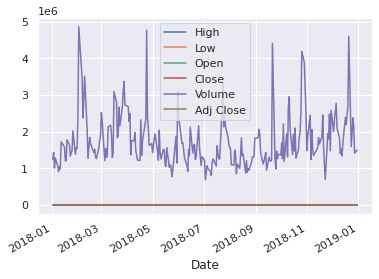

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog.plot();


# Resampling and converting frequencies

/home/manikanta/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 48.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/home/manikanta/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 48.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/home/manikanta/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 48.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/home/manikanta/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1095: UserWarning: Attempting to set identical left == right == 48.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/home/manikanta/.loc

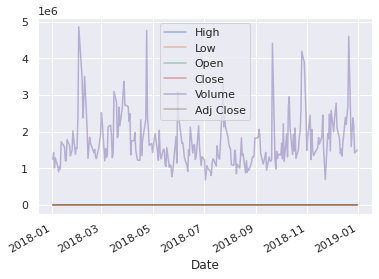

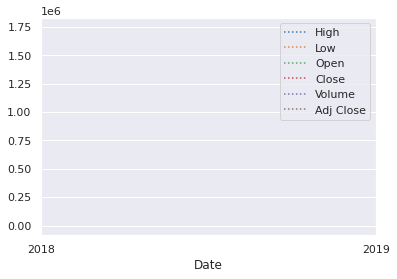

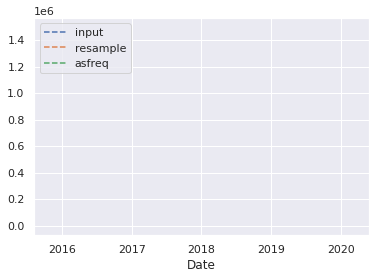

In [36]:
import matplotlib.pyplot as plt
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

/home/manikanta/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/manikanta/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/manikanta/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/manikanta/.local/lib/python3.6/site

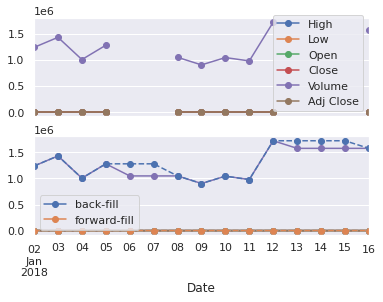

In [37]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

# Time-shifts

/home/manikanta/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/manikanta/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/manikanta/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/manikanta/.local/lib/python3.6/site

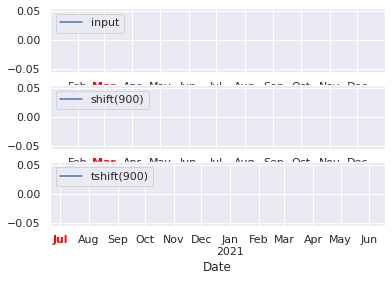

In [38]:
import pandas as pd
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

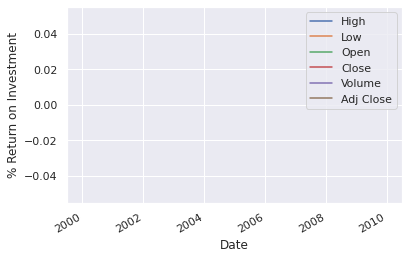

In [39]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');



# Rolling windows

In [40]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.var()})
ax = data.plot(style=['-g', '--r', ':b'])
ax.lines[0].set_alpha(0.3)

ValueError: If using all scalar values, you must pass an index

In [42]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-g', '--r', ':b'])
ax.lines[2].set_alpha(0.5)

ValueError: If using all scalar values, you must pass an index